Red neuronal, comparitvo de Elizabeta

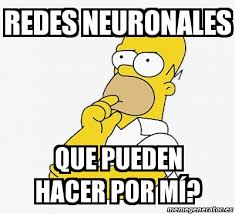

In [ ]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Función para convertir la cadena de embeddings a una lista de floats y luego a un array de NumPy
def convert_embedding(embedding_str):
    try:
        if pd.isna(embedding_str) or embedding_str.strip() == '':
            return None
        embedding_list = ast.literal_eval(embedding_str)
        if isinstance(embedding_list, list):
            return np.array(embedding_list, dtype=np.float32)  # Asegurar que sea un array de floats
        else:
            return None
    except Exception as e:
        print(f"Error al convertir embedding: {e}")
        return None

In [ ]:
# Cargar el DataFrame desde el archivo
df = pd.read_excel('/content/sample_data/etiquetastotal.xlsx')

# Definir columnas de embeddings
embedding_columns = ['hechos-emb', 'pretensiones-emb',
                     'Consideraciones 1-emb', 'Consideraciones 2-emb',
                     'Consideraciones 3-emb', 'Consideraciones 4-emb']

In [ ]:
# Aplicar la función para convertir embeddings a cada columna
for col in embedding_columns:
    df[col] = df[col].apply(convert_embedding)

In [ ]:
# Eliminar filas donde algún embedding sea None
df = df.dropna(subset=embedding_columns)

In [ ]:
# Definir X (características) y y (etiquetas)
X = df[embedding_columns].values
y = df['Etiqueta'].values  # Asumiendo que 'Etiqueta' es la columna de etiquetas

In [ ]:
# Codificar las etiquetas si es necesario
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Suponiendo que X_train tiene las características de entrada y su forma es (número de ejemplos, número de características)
input_shape = X_train.shape[1]

# Luego, puedes definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoid para clasificación binaria
])

In [ ]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import tensorflow as tf
# Entrenar el modelo
history = model.fit(tf.convert_to_tensor(X_train),
                    tf.convert_to_tensor(y_train),
                    epochs=50,
                    batch_size=32,
                    validation_data=(tf.convert_to_tensor(X_test),
                                     tf.convert_to_tensor(y_test)))

Epoch 1/50
3/3 [==============================] - 2s 127ms/step - loss: 0.6953 - accuracy: 0.4625 - val_loss: 0.6912 - val_accuracy: 0.6190
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.6190
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6910 - accuracy: 0.5625 - val_loss: 0.6914 - val_accuracy: 0.6190
Epoch 4/50
3/3 [==============================] - 0s 16ms/step - loss: 0.6918 - accuracy: 0.5500 - val_loss: 0.6912 - val_accuracy: 0.6190
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6935 - accuracy: 0.4125 - val_loss: 0.6910 - val_accuracy: 0.6190
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.4625 - val_loss: 0.6909 - val_accuracy: 0.6190
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6916 - accuracy: 0.5875 - val_loss: 0.6909 - val_accuracy: 0.6190
Epoch 8/50
3/3 [==========

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test), verbose=0)
print(f'Loss en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')


Loss en el conjunto de prueba: 0.6834874153137207
Precisión en el conjunto de prueba: 0.7142857313156128


In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(tf.convert_to_tensor(X_test))
y_pred_classes = (y_pred > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)

1/1 [==============================] - 0s 92ms/step


In [ ]:
# Puedes imprimir las predicciones y las etiquetas reales para comparar
print("Predicciones:", y_pred_classes.flatten())
print("Etiquetas reales:", y_test.values)

Predicciones: [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
Etiquetas reales: [1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1]


In [ ]:
# Si quieres calcular métricas adicionales, puedes usar:
from sklearn.metrics import confusion_matrix, classification_report
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_classes))

Matriz de confusión:
[[ 2  6]
 [ 0 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.68      1.00      0.81        13

    accuracy                           0.71        21
   macro avg       0.84      0.62      0.61        21
weighted avg       0.80      0.71      0.66        21



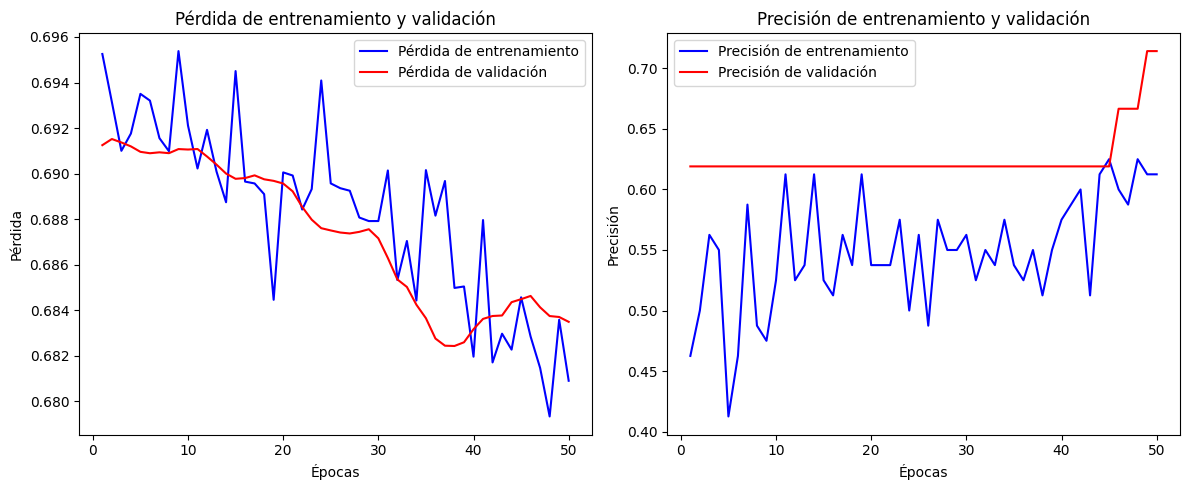

In [ ]:
import matplotlib.pyplot as plt

# Extraer la información del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crear las gráficas
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Precisión de entrenamiento')
plt.plot(epochs, val_accuracy, 'r', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

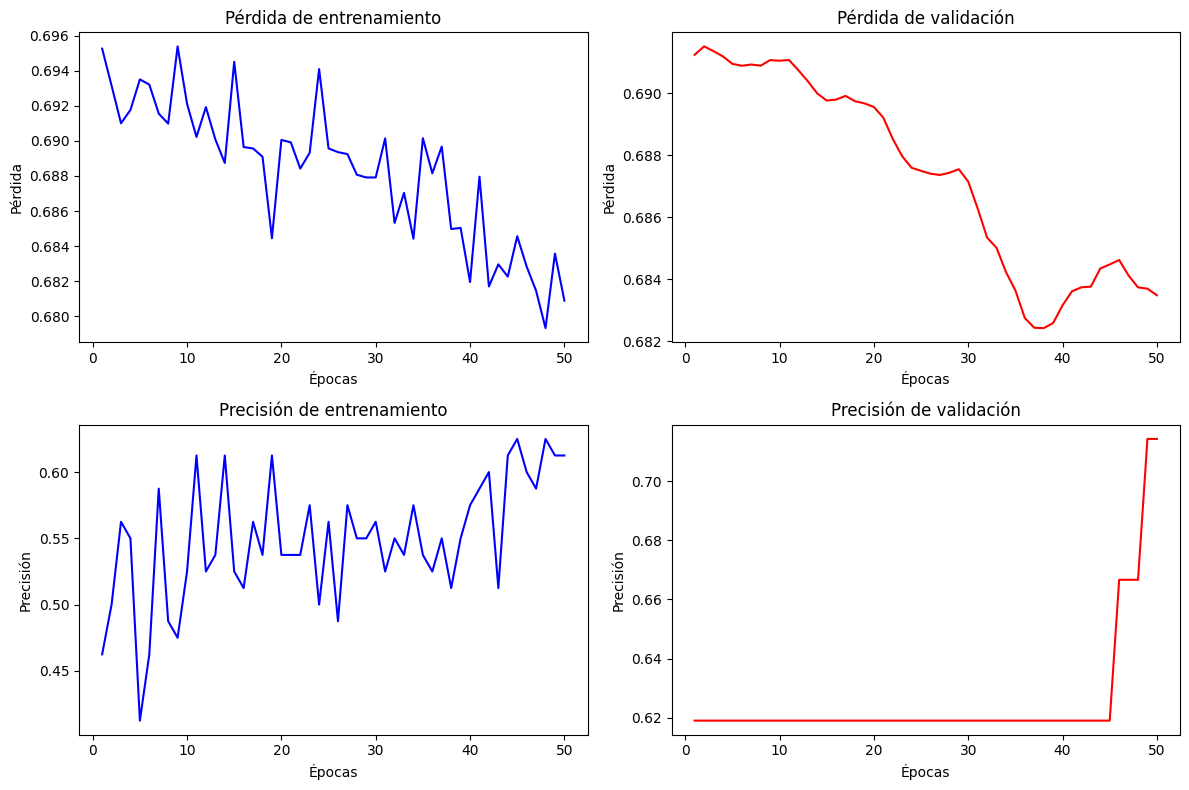

In [ ]:
import matplotlib.pyplot as plt

# Extraer la información del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crear las gráficas
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 8))

# Gráfica de pérdida de entrenamiento
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss, 'b')
plt.title('Pérdida de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

# Gráfica de pérdida de validación
plt.subplot(2, 2, 2)
plt.plot(epochs, val_loss, 'r')
plt.title('Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

# Gráfica de precisión de entrenamiento
plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracy, 'b')
plt.title('Precisión de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')

# Gráfica de precisión de validación
plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracy, 'r')
plt.title('Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')

plt.tight_layout()
plt.show()